## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

In [1]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

mname='hams2' 
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
# extents=[   np.round_(geom_rp['coordinates'][0][0][0]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][2][0]-step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][1][1]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][0][1]-step_in, decimals=-3),
#             model_base,1200]

#print(extents)
gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, 295, 913],
      resolution = (50,50,50), 
      path_o = 'hams2/gempy/hams2_orientations2.txt',
      path_i = 'hams2/gempy/hams2_contacts2.txt', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [2]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()

A-FO-od          250
P_-HAb-cib       156
A-HAS-xsl-ci      94
A-HAm-cib         94
A-FO-xo-a         91
A-FOj-xs-b        72
A-HAd-kd          69
P_-HAw-fr         54
P_-HAo-ci         43
P_-HAj-xci-od     40
A-FOu-bbo         31
A-FOh-xs-f        29
P_-TK-s           28
A-mgn-PRK         23
P_-SKq-stq        21
P_-WYm-sp         20
A-FOo-bbo         17
P_-TKa-xs-k       16
A-FOp-bs          15
A-FOr-b           12
P_-TKo-stq        10
P_-WYd-kd          6
P_-TKk-sf          4
A-mgn-PMI          3
P_-WYa-st          3
P_-SKb-bb          2
basement           0
Name: surface, dtype: int64

## Show example orientations

In [3]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A-FOj-xs-b       21
A-FOh-xs-f       20
P_-HAb-cib       16
A-HAm-cib        13
A-FOu-bbo         9
A-FOp-bs          7
A-HAS-xsl-ci      6
P_-SKq-stq        5
A-FO-od           4
P_-HAj-xci-od     3
P_-TKk-sf         3
A-HAd-kd          3
P_-TK-s           2
A-mgn-PRK         2
P_-WYd-kd         1
P_-WYa-st         1
A-mgn-PMI         1
P_-WYm-sp         1
P_-HAo-ci         1
A-FO-xo-a         1
P_-HAw-fr         0
P_-TKo-stq        0
P_-TKa-xs-k       0
A-FOo-bbo         0
A-FOr-b           0
P_-SKb-bb         0
basement          0
Name: surface, dtype: int64

## Plot some of this data

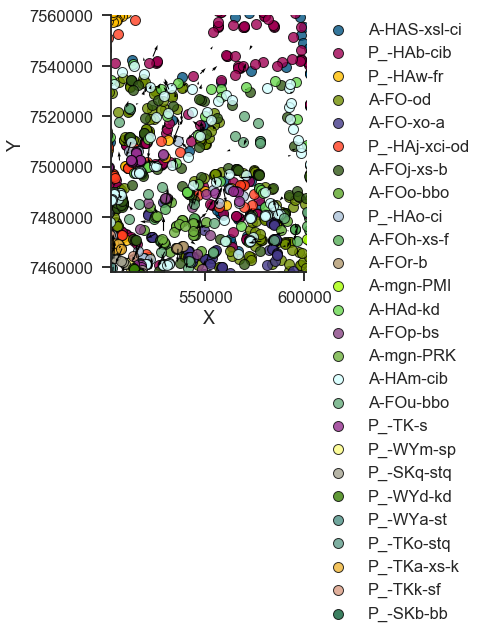

In [4]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

Cropped raster to geo_model.grid.extent.
[ 502536  600652 7458000 7560000] [115 110]
storing converted file...
Active grids: ['regular' 'topography']


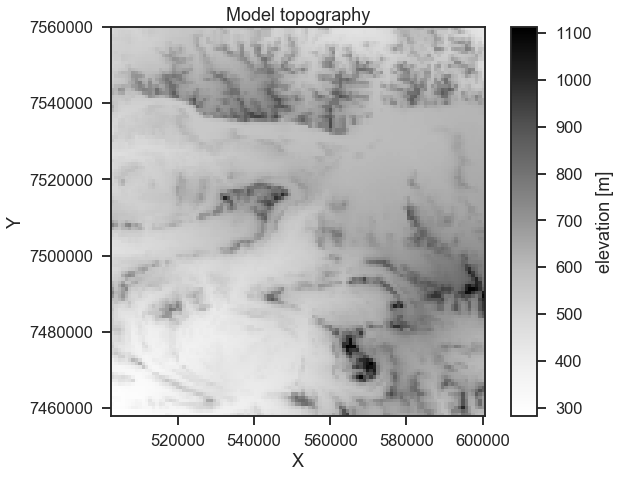

In [5]:
fp = 'hams2/dtm/hams2_dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)

## Load stratigraphic Series

f=open('hams2/tmp/hams2_groups.txt',"r")
contents =f.readlines()
f.close

# # This is not necessary all data objects are created and linked to geo_model on the init call!!!

# # faults = gp.Faults()
# # series = gp.Series(faults)
# # series.df

ngroups=(contents[0]).split(" ")
ngroups=int(ngroups[1])
groups=[]

for i in range (1,int(ngroups)+1):
     groups.append(contents[i].replace("\n",""))
#     geo_model.add_series(contents[i].replace("\n",""))

# geo_model.delete_series(['Default series', 'Basement'])



## Load surfaces and assign to series

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A-HAS-xsl-ci,Default series,1,False,#015482,1
1,P_-HAb-cib,Default series,2,False,#9f0052,2
2,P_-HAw-fr,Default series,3,False,#ffbe00,3
3,A-FO-od,Default series,4,False,#728f02,4
4,A-FO-xo-a,Default series,5,False,#443988,5
5,P_-HAj-xci-od,Default series,6,False,#ff3f20,6
6,A-FOj-xs-b,Default series,7,False,#325916,7
7,A-FOo-bbo,Default series,8,False,#5DA629,8
8,P_-HAo-ci,Default series,9,False,#acc2d9,9
9,A-FOh-xs-f,Default series,10,False,#56ae57,10


In [7]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


In [8]:

for i in range(0,ngroups):
    f=open('hams2/tmp/'+groups[i]+'.txt',"r")
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))

    for j in range (1,int(nformations)+1):
        print(contents[j].replace("\n",""))
        #geo_model.add_surfaces(contents[j].replace("\n",""))
        #d={groups[i]:contents[j].replace("\n","")}
        gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n",""))},
                                  set_series=True, remove_unused_series=True)
        #geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )
    f.close

P_-WYa-st
P_-WYm-sp
P_-WYd-kd
P_-SKq-stq
P_-SKb-bb
P_-TK-s
P_-TKa-xs-k
P_-TKo-stq
P_-TKk-sf
P_-HAo-ci
P_-HAw-fr
P_-HAj-xci-od
P_-HAb-cib
A-HAS-xsl-ci
A-HAd-kd
A-HAm-cib
A-FO-xo-a
A-FO-od
A-FOj-xs-b
A-FOu-bbo
A-FOp-bs
A-FOo-bbo
A-FOh-xs-f
A-FOr-b
A-mgn-PMI
A-s-PMI
A-mgn-PRK
A-s-PRK
A-b-PRK


In [9]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
20,P_-WYd-kd,Wyloo_Group,1,False,#388004,1
18,P_-WYm-sp,Wyloo_Group,2,False,#fcfc81,2
21,P_-WYa-st,Wyloo_Group,3,False,#4c9085,3
25,P_-SKb-bb,Shingle_Creek_Group,1,False,#0a5f38,4
19,P_-SKq-stq,Shingle_Creek_Group,2,False,#a5a391,5
24,P_-TKk-sf,Turee_Creek_Group,1,False,#d99b82,6
22,P_-TKo-stq,Turee_Creek_Group,2,False,#5e9b8a,7
23,P_-TKa-xs-k,Turee_Creek_Group,3,False,#efb435,8
17,P_-TK-s,Turee_Creek_Group,4,False,#952e8f,9
15,A-HAm-cib,Hamersley_Group,1,False,#d4ffff,10


In [10]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
803,516400.499486,7.457780e+06,321,0.342714,0.260990,0.498421,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
804,516446.779527,7.457767e+06,321,0.342921,0.260931,0.498421,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
805,517092.755737,7.457585e+06,342,0.345814,0.260119,0.498515,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
806,513435.845395,7.459733e+06,396,0.329437,0.269739,0.498756,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
807,513811.737604,7.459573e+06,396,0.331120,0.269022,0.498756,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
808,514214.277508,7.459402e+06,339,0.332923,0.268254,0.498501,P_-WYd-kd,Wyloo_Group,1,1,1.000000e-08
402,518544.985453,7.457110e+06,346,0.352318,0.257990,0.498533,P_-WYm-sp,Wyloo_Group,2,1,1.000000e-08
403,518925.230236,7.456455e+06,337,0.354021,0.255056,0.498492,P_-WYm-sp,Wyloo_Group,2,1,1.000000e-08
404,519178.000210,7.455979e+06,337,0.355153,0.252928,0.498492,P_-WYm-sp,Wyloo_Group,2,1,1.000000e-08
405,511530.255956,7.455348e+06,304,0.320902,0.250100,0.498344,P_-WYm-sp,Wyloo_Group,2,1,1.000000e-08


In [11]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
3,503404.331934,7.460230e+06,298,0.284510,0.271966,0.498318,-2.467767e-02,-0.706676,0.707107,45,182,1,P_-WYd-kd,Wyloo_Group,1,1,0.01
2,504669.323074,7.461017e+06,299,0.290175,0.275488,0.498322,-1.639990e-02,-0.939550,0.342020,70,181,1,P_-WYm-sp,Wyloo_Group,2,1,0.01
117,507893.288924,7.457420e+06,293,0.304614,0.259381,0.498295,1.164894e-01,0.406247,0.906308,25,16,1,P_-WYa-st,Wyloo_Group,3,1,0.01
4,517319.479838,7.458552e+06,338,0.346830,0.264447,0.498497,-5.653432e-02,-0.164188,0.984808,10,199,1,P_-SKq-stq,Shingle_Creek_Group,5,2,0.01
9,503809.705274,7.463490e+06,296,0.286325,0.286564,0.498309,4.852505e-02,0.925913,0.374607,68,3,1,P_-SKq-stq,Shingle_Creek_Group,5,2,0.01
10,502536.429960,7.468201e+06,460,0.280623,0.307664,0.499043,-1.501229e-01,-0.231169,0.961262,16,213,1,P_-SKq-stq,Shingle_Creek_Group,5,2,0.01
11,502536.419086,7.469580e+06,361,0.280623,0.313838,0.498600,-2.173269e-02,-0.206773,0.978148,12,186,1,P_-SKq-stq,Shingle_Creek_Group,5,2,0.01
13,507187.876941,7.468501e+06,332,0.301455,0.309008,0.498470,-1.020678e-01,-0.140484,0.984808,10,216,1,P_-SKq-stq,Shingle_Creek_Group,5,2,0.01
7,507945.284967,7.467496e+06,437,0.304847,0.304505,0.498940,-3.313588e-01,-0.780632,0.529919,58,203,1,P_-TKk-sf,Turee_Creek_Group,6,3,0.01
8,503517.659190,7.466604e+06,410,0.285017,0.300510,0.498819,1.000000e-12,0.866025,0.500000,60,0,1,P_-TKk-sf,Turee_Creek_Group,6,3,0.01


## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [12]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1

In [13]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float 32

In [14]:
geo_model.additional_data.options.df['dtype'] = 'float32'
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


Compilation Done!


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.39805e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.06245e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.09024e-16): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.61544e-21): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=5.75266e-19): result may not be accurate.
  rval = scipy.linalg.solve(A

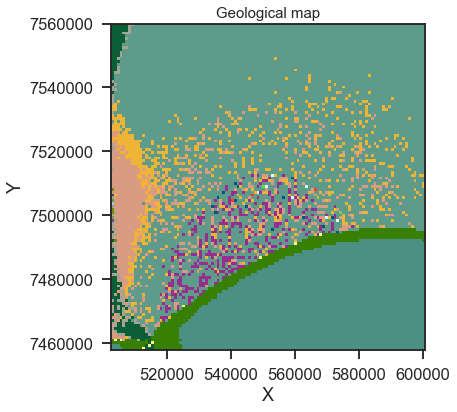

In [15]:
gp.compute_model(geo_model)
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

### Float64

In [16]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [17]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [18]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,26
number series,7
number surfaces per series,"[3, 2, 4, 7, 8, 1, 1]"
len surfaces surface_points,"[3, 6, 20, 2, 21, 28, 10, 16, 4, 94, 69, 94, 40, 156, 54, 43, 17, 29, 15, 31, 250, 72, 12, 91, 3, 23]"
len series surface_points,"[29, 23, 58, 550, 517, 3, 23]"
len series orientations,"[3, 5, 5, 42, 62, 1, 2]"


## Calculate Model

In [19]:
gp.compute_model(geo_model)

../../../../gempy/gempy/core/solution.py:259: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:0
  '; Surface Number:' + str(s_n))



Lithology ids 
  [1. 1. 1. ... 6. 6. 6.] 

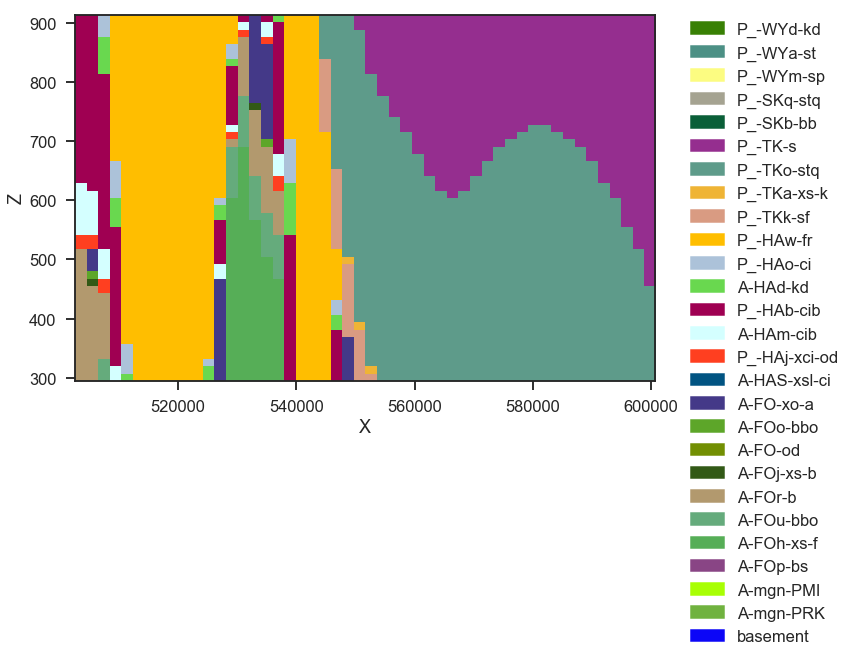

In [20]:
gp.plot.plot_section(geo_model, ve=100)

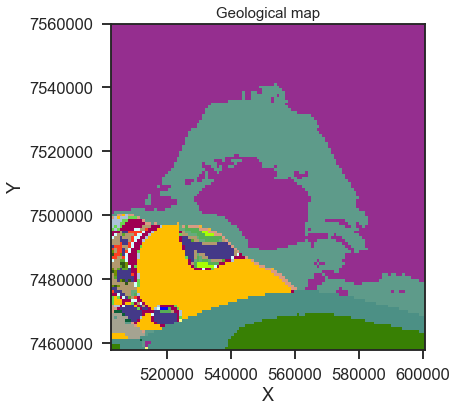

In [21]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

## Extract surfaces to visualize in 3D renderers

In [22]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [23]:
gp.plot.plot_3D(geo_model, ve=20, render_data=False)

closing vtk


In [24]:
break

SyntaxError: 'break' outside loop (<ipython-input-24-6aaf1f276005>, line 4)

## Export model to vtk files

In [ ]:
from gempy import plot
gp.plot.export_to_vtk(geo_model, path='.\\vtk\\', name=mname+'.vtk', voxels=False, block=None, surfaces=True)